In [1]:
# @title $Start$
from IPython.display import HTML, Math, display
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import pandas as pd

# Functions
def plot2D(A1,n):
    A = A1[:2,:n]
    X = A[0]
    X = np.append(X,X[0])

    Y = A[1]
    Y = np.append(Y,Y[0])

    plt.plot(X, Y, color='red')

    #plt.show()

Coordinates of P0
1,1
Coordinates of P1
1,3
Coordinates of P2
4,3
Coordinates of P3
4,1


<IPython.core.display.Math object>

<IPython.core.display.Math object>

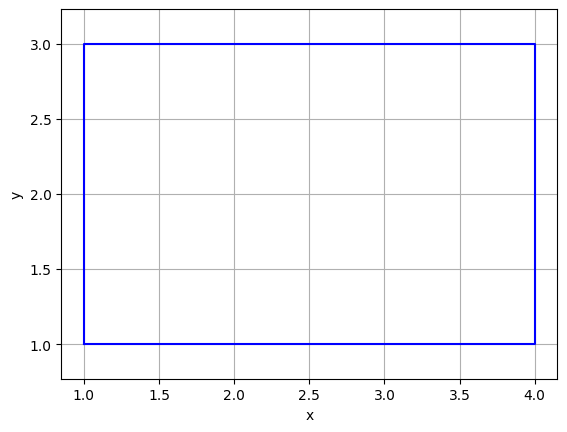

In [2]:
# @title $Enter \ \ Coordinates \ \ of \ \ Points $
n = 4 # @param {type:"integer"}

points = []
for i in range(n):
    print('Coordinates of P',i,sep='')
    temp=[int(i) for i in input().split(',')]
    points.append(temp)

A = np.array(points).T
display(Math(r'A='+sp.latex(sp.Matrix(A))))
print()
A1 = np.append(np.append(A,[[(1) for i in range(n)]], axis=0), [[0],[0],[1]], axis=1)
display(Math(r'{\hat{A}='+sp.latex(sp.Matrix(A1)) +r'}'))

X0 = A[0]
X0 = np.append(X0,X0[0])

Y0 = A[1]
Y0 = np.append(Y0,Y0[0])

plt.plot(X0,Y0, color = 'blue')
plt.xlabel("x")
plt.ylabel("y")
plt.axis('equal')
plt.grid()
plt.show()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

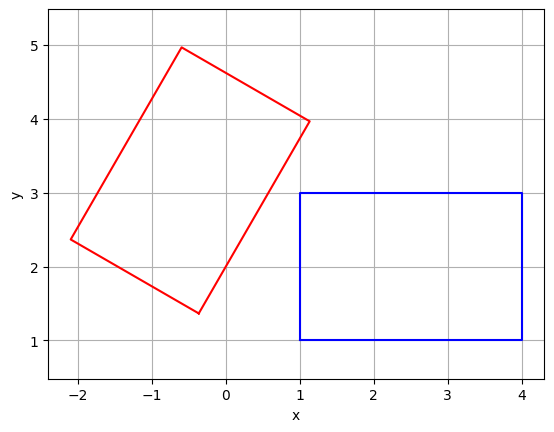

In [3]:
# @title $Rotation$ { form-width: "20%" }
theta = 60 # @param {type:"number"}

theta = theta*np.pi/180
R = np.array([[np.cos(theta), -1*np.sin(theta),0], [np.sin(theta), np.cos(theta),0],[0,0,1]])
display(Math(r'{R='+sp.latex(sp.Matrix(np.round(R,4))) + r' \ \ , \ \ \hat{A}='+sp.latex(sp.Matrix(A1)) +r'}'))

print()

RA1 = R@A1
display(Math(r'{R \hat{A}='+sp.latex(sp.Matrix(np.round(RA1,4)))+r'}'))
plot2D(RA1,n) #function
plt.plot(X0,Y0, color = 'blue')
plt.xlabel("x")
plt.ylabel("y")
plt.axis('equal')
plt.grid()
plt.show()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

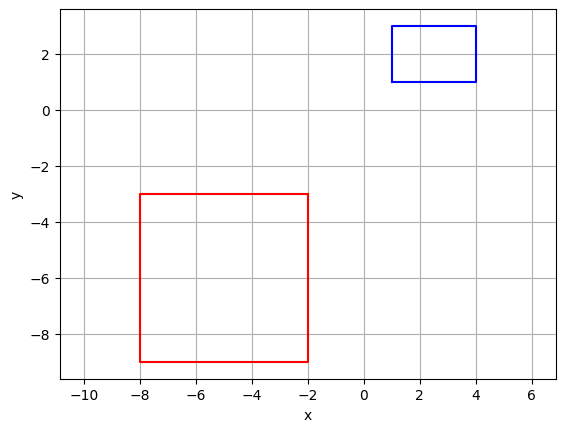

In [4]:
# @title $Scaling$ { form-width: "20%" }
v = "-2,-3" # @param {type:"string"}

v = v.split(',')
v = [float(v[i]) for i in range(len(v))]
v.append(1)
S = np.diag(v)
display(Math(r'{S='+sp.latex(sp.Matrix(np.round(S,4))) + r' \ \ , \ \ \hat{A}='+sp.latex(sp.Matrix(A1)) +r'}'))
print()
SA1 = S@A1
display(Math(r'{S \hat{A}='+sp.latex(sp.Matrix(np.round(SA1,4)))+r'}'))
plot2D(SA1,n)
plt.plot(X0,Y0,color='blue')
plt.xlabel("x")
plt.ylabel("y")
plt.axis('equal')
plt.grid()
plt.show()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

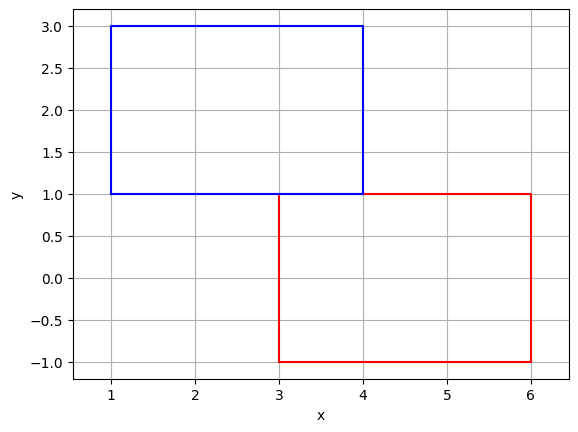

In [5]:
# @title $Translation$ { run: "auto", form-width: "20%" }
v = "2,-2" # @param {type:"string"}

v = v.split(',')
v = [float(v[i]) for i in range(len(v))]

T = np.eye(3)
for i in range(2):
    T[i,2] = v[i]

display(Math(r'{T='+sp.latex(sp.Matrix(np.round(T,4))) + r' \ \ , \ \ \hat{A}='+sp.latex(sp.Matrix(A1)) +r'}'))
print()
TA1 = T@A1
display(Math(r'{T \hat{A}='+sp.latex(sp.Matrix(np.round(TA1,4)))+r'}'))
plot2D(TA1,n)
plt.plot(X0,Y0,color='blue')
plt.xlabel("x")
plt.ylabel("y")
plt.axis('equal')
plt.grid()
plt.show()

Shx = 2



<IPython.core.display.Math object>

<IPython.core.display.Math object>

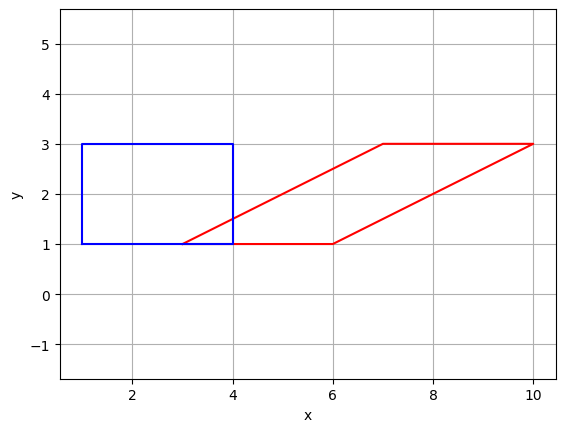

In [6]:
# @title $Shearing$ { run: "auto", form-width: "20%" }
direction = "x-direction" # @param ["x-direction", "y-direction", "xy-direction"]

SH = np.eye(3)
if(direction == "x-direction"):
    Shx = float(input('Shx = '))
    SH[0,1]=Shx
    ext = r'{Sh_{x}'
elif(direction == "y-direction"):
    Shy = float(input('Shy = '))
    SH[1,0]=Shy
    ext = r'{Sh_{y}'
elif(direction == "xy-direction"):
    Shx = float(input('Shx = '))
    Shy = float(input('Shy = '))
    SH[0,1]=Shx
    SH[1,0]=Shy
    ext = r'{Sh_{xy}'

print()
display(Math(ext +r'=' + sp.latex(sp.Matrix(np.round(SH,4))) + r' \ \ , \ \ \hat{A}='+sp.latex(sp.Matrix(A1)) +r'}'))
print()

SHA1 = SH@A1
display(Math(ext + r'\hat{A} = ' + sp.latex(sp.Matrix(SHA1))+r'}'))
plot2D(SHA1,n)
plt.plot(X0,Y0,color='blue')
plt.xlabel("x")
plt.ylabel("y")
plt.axis('equal')
plt.grid()
plt.show()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

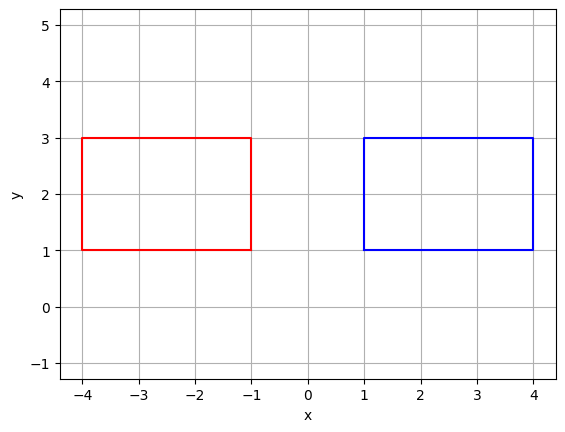

In [7]:
# @title $Reflection$ {form-width: "20%" }
About = "y-axis" # @param ["x-axis", "y-axis"]

Rf = np.eye(3)
if(About == 'x-axis'):
    Rf[1,1] = -1
    display(Math(r'{R_{x} = ' + sp.latex(sp.Matrix(Rf))+ r' \ \ , \ \ \hat{A}='+sp.latex(sp.Matrix(A1)) +r'}'))
    ext = r'{R_{x}'
elif(About == 'y-axis'):
    Rf[0,0] = -1
    display(Math(r'{R_{y} = ' + sp.latex(sp.Matrix(Rf)) + r' \ \ , \ \ \hat{A}='+sp.latex(sp.Matrix(A1)) +r'}'))
    ext = r'{R_{y}'

print()

RfA1 = Rf@A1
display(Math(ext +r'\hat{A}=' + sp.latex(sp.Matrix(RfA1))+r'}'))
plot2D(RfA1,n)
plt.plot(X0,Y0,color='blue')
plt.xlabel("x")
plt.ylabel("y")
plt.axis('equal')
plt.grid()
plt.show()



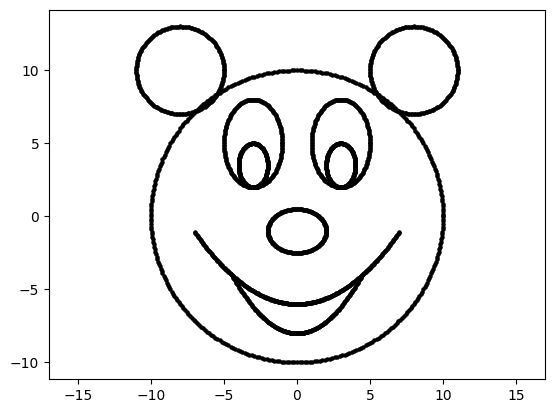

In [8]:
# @title $Original \ \ Image$

import math
X=[]
Y=[]

# Head (circle)
center_x = 0
center_y = 0
radius = 10  # Adjust as needed based on desired size
for i in range(0, 361):
  angle = math.radians(i)
  x = center_x + radius * math.cos(angle)
  y = center_y + radius * math.sin(angle)
  X.append(x)
  Y.append(y)

# Left Ear (Circle)
center_x = -8
center_y = 10
radius = 3  # Adjust as needed based on desired size
for i in range(0,361,2):
  angle = math.radians(i)
  x = center_x + radius * math.cos(angle)
  y = center_y + radius * math.sin(angle)
  X.append(x)
  Y.append(y)

# Right Ear (Circle)
center_x = 8
center_y = 10
radius = 3  # Adjust as needed based on desired size
for i in range(0,361,2):
  angle = math.radians(i)
  x = center_x + radius * math.cos(angle)
  y = center_y + radius * math.sin(angle)
  X.append(x)
  Y.append(y)

# Left eye (ellipse)
center_x = -3  # Adjust as needed based on desired position
center_y = 5
radius_x = 2  # Adjust for horizontal radius (width) of the ellipse
radius_y = 3  # Adjust for vertical radius (height) of the ellipse

for angle in range(0,361,2):
  # Convert angle to radians for math functions
  angle_rad = math.radians(angle)

  # Elliptical offset based on angle and radius
  x_offset = radius_x * math.cos(angle_rad)
  y_offset = radius_y * math.sin(angle_rad)

  # Final x and y coordinates for the ellipse point
  x = center_x + x_offset
  y = center_y + y_offset
  X.append(x)
  Y.append(y)

# Left Eyeball
center_x = -3  # Adjust as needed based on desired position
center_y = 3.5
radius_x = 1  # Adjust for horizontal radius (width) of the ellipse
radius_y = 1.5  # Adjust for vertical radius (height) of the ellipse

for angle in range(0,361,2):
  # Convert angle to radians for math functions
  angle_rad = math.radians(angle)

  # Elliptical offset based on angle and radius
  x_offset = radius_x * math.cos(angle_rad)
  y_offset = radius_y * math.sin(angle_rad)

  # Final x and y coordinates for the ellipse point
  x = center_x + x_offset
  y = center_y + y_offset
  X.append(x)
  Y.append(y)


# Right eye (ellipse)
center_x = 3  # Adjust as needed based on desired position
center_y = 5
radius_x = 2  # Adjust for horizontal radius (width) of the ellipse
radius_y = 3  # Adjust for vertical radius (height) of the ellipse

for angle in range(0,361,2):
  # Convert angle to radians for math functions
  angle_rad = math.radians(angle)

  # Elliptical offset based on angle and radius
  x_offset = radius_x * math.cos(angle_rad)
  y_offset = radius_y * math.sin(angle_rad)

  # Final x and y coordinates for the ellipse point
  x = center_x + x_offset
  y = center_y + y_offset
  X.append(x)
  Y.append(y)

# Right Eyeball
center_x = 3  # Adjust as needed based on desired position
center_y = 3.5
radius_x = 1  # Adjust for horizontal radius (width) of the ellipse
radius_y = 1.5  # Adjust for vertical radius (height) of the ellipse

for angle in range(0,361,2):
  # Convert angle to radians for math functions
  angle_rad = math.radians(angle)

  # Elliptical offset based on angle and radius
  x_offset = radius_x * math.cos(angle_rad)
  y_offset = radius_y * math.sin(angle_rad)

  # Final x and y coordinates for the ellipse point
  x = center_x + x_offset
  y = center_y + y_offset
  X.append(x)
  Y.append(y)

# Nose (Ellipse)
center_x = 0  # Adjust as needed based on desired position
center_y = -1
radius_x = 2  # Adjust for horizontal radius (width) of the ellipse
radius_y = 1.5  # Adjust for vertical radius (height) of the ellipse

for angle in range(0,361,2):
  # Convert angle to radians for math functions
  angle_rad = math.radians(angle)

  # Elliptical offset based on angle and radius
  x_offset = radius_x * math.cos(angle_rad)
  y_offset = radius_y * math.sin(angle_rad)

  # Final x and y coordinates for the ellipse point
  x = center_x + x_offset
  y = center_y + y_offset
  X.append(x)
  Y.append(y)

# Mouth (curve)
# Upper Lip
x_ul = np.arange(-7,7.05,0.05)
y_ul = 0.1*(x_ul**2)-6
for i in range(len(x_ul)):
  X.append(x_ul[i])
  Y.append(y_ul[i])

#Lower Lip
x_ll = np.arange(-4.5,4.55,0.05)
y_ll = 0.2*(x_ll**2)-8
for i in range(len(x_ll)):
  X.append(x_ll[i])
  Y.append(y_ll[i])

A = np.array([X,Y])
A2 = np.append(A,[[(1) for i in range(len(X))]], axis=0)
A2 = np.append(A2,[[0],[0],[1]], axis=1)

plt.scatter(A2[0][0:-1],A2[1][0:-1],color='black',s=5)
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.axis('equal')
plt.show()


In [9]:
np.shape(A)

(2, 2090)

<IPython.core.display.Math object>

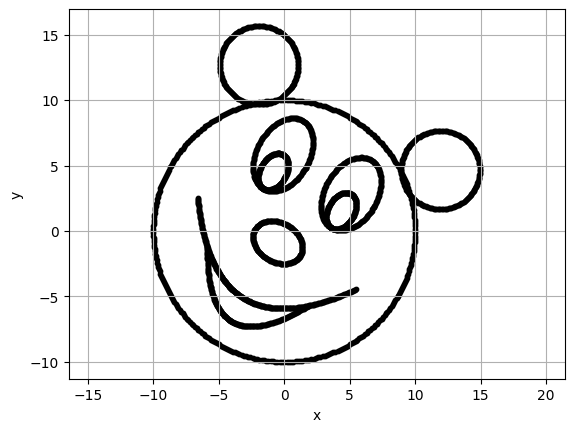

In [10]:
# @title $Rotation$ { form-width: "20%" }
theta = -30 # @param {type:"number"}

theta = theta*np.pi/180
R = np.array([[np.cos(theta), -1*np.sin(theta),0], [np.sin(theta), np.cos(theta),0],[0,0,1]])
display(Math(r'{R='+sp.latex(sp.Matrix(np.round(R,4))) +r'}'))

print()

RA2 = R@A2
#display(Math(r'{R \hat{A}='+sp.latex(sp.Matrix(RA2))+r'}'))
plt.scatter(RA2[0][0:-1],RA2[1][0:-1],color='black',s=10)
plt.xlabel("x")
plt.ylabel("y")
plt.axis('equal')
plt.grid()
plt.show()

<IPython.core.display.Math object>

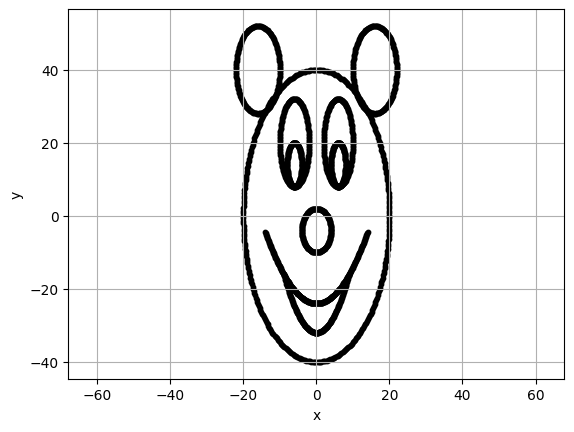

In [11]:
# @title $Scaling$
v = "2,4" # @param {type:"string"}

v = v.split(',')
v = [float(v[i]) for i in range(len(v))]
v.append(1)
S = np.diag(v)
display(Math(r'{S='+sp.latex(sp.Matrix(S)) +r'}'))
print()
SA2 = S@A2
#display(Math(r'{S \hat{A}='+sp.latex(sp.Matrix(SA2))+r'}'))
plt.scatter(SA2[0][0:-1],SA2[1][0:-1],color='black',s=10)
plt.xlabel("x")
plt.ylabel("y")
plt.axis('equal')
plt.grid()
plt.show()

<IPython.core.display.Math object>

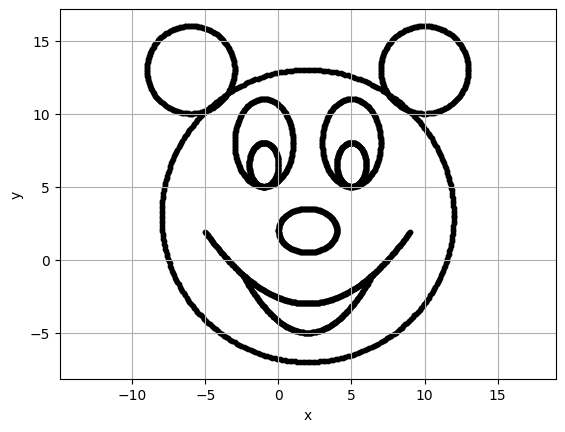

In [12]:
# @title $Translation$ { run: "auto", form-width: "20%" }
v = "2,3" # @param {type:"string"}

v = v.split(',')
v = [float(v[i]) for i in range(len(v))]

T = np.eye(3)
for i in range(2):
    T[i,2] = v[i]

display(Math(r'{T='+sp.latex(sp.Matrix(T)) +r'}'))
print()
TA2 = T@A2
#display(Math(r'{T \hat{A}='+sp.latex(sp.Matrix(TA2))+r'}'))
plt.scatter(TA2[0][0:-1],TA2[1][0:-1],color='black',s=10)
plt.xlabel("x")
plt.ylabel("y")
plt.axis('equal')
plt.grid()
plt.show()

Shx = 1
Shy = 2



<IPython.core.display.Math object>

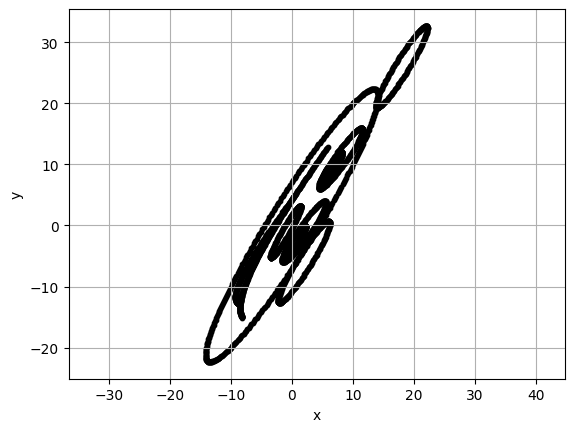

In [13]:
# @title $Shearing${ run: "auto" }
direction = "xy-direction" # @param ["x-direction", "y-direction", "xy-direction"]

SH = np.eye(3)
if(direction == "x-direction"):
    Shx = float(input('Shx = '))
    SH[0,1]=Shx
    ext = r'{Sh_{x}'
elif(direction == "y-direction"):
    Shy = float(input('Shy = '))
    SH[1,0]=Shy
    ext = r'{Sh_{y}'
elif(direction == "xy-direction"):
    Shx = float(input('Shx = '))
    Shy = float(input('Shy = '))
    SH[0,1]=Shx
    SH[1,0]=Shy
    ext = r'{Sh_{xy}'

print()
display(Math(ext +r'=' + sp.latex(sp.Matrix(SH))+r'}'))
print()

SHA2 = SH@A2
#display(Math(ext + r'\hat{A} = ' + sp.latex(sp.Matrix(SHA2))+r'}'))
plt.scatter(SHA2[0][0:-1],SHA2[1][0:-1],color='black',s=10)
plt.xlabel("x")
plt.ylabel("y")
plt.axis('equal')
plt.grid()
plt.show()

<IPython.core.display.Math object>

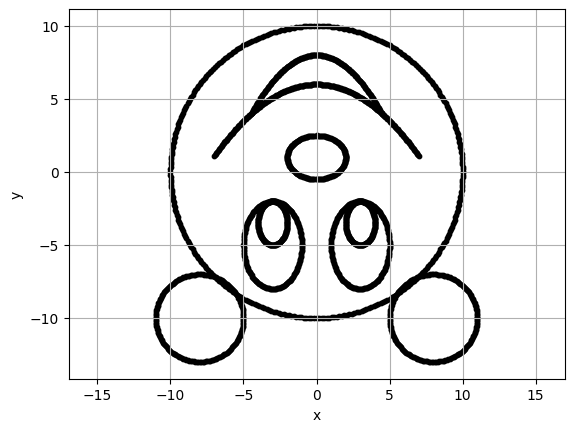

In [14]:
# @title $Reflection${ run: "auto" }
About = "x-axis" # @param ["x-axis", "y-axis"]

Rf = np.eye(3)
if(About == 'x-axis'):
    Rf[1,1] = -1
    display(Math(r'{R_{x} = ' + sp.latex(sp.Matrix(Rf))+r'}'))
    ext = r'{R_{x}'
elif(About == 'y-axis'):
    Rf[0,0] = -1
    display(Math(r'{R_{y} = ' + sp.latex(sp.Matrix(Rf))+r'}'))
    ext = r'{R_{y}'

print()

RfA2 = Rf@A2
#display(Math(ext + r'\hat{A} = ' + sp.latex(sp.Matrix(RfA2))+r'}'))
plt.scatter(RfA2[0][0:-1],RfA2[1][0:-1],color='black',s=10)
plt.xlabel("x")
plt.ylabel("y")
plt.axis('equal')
plt.grid()
plt.show()